[tsf-484-wpa-1-254.epfl.ch:29565] shmem: mmap: an error occurred while determining whether or not /var/folders/n0/gs1g7p590qg7trf8pp8w29ch0000gn/T//ompi.tsf-484-wpa-1-254.501/jf.0/3013804032/sm_segment.tsf-484-wpa-1-254.501.b3a30000.0 could be created.


[000000.00] [0/1] 10-17 11:44  Chain                     INFO     Loading ./sampler_result/chain_FOLPS_V25_z1.0_SF.npy.
[000000.27] [0/1] 10-17 11:44  Chain                     INFO     Loading ./sampler_result/chain_FOLPS_V25_z1.0_STD.npy.
Removed no burn in
Removed no burn in


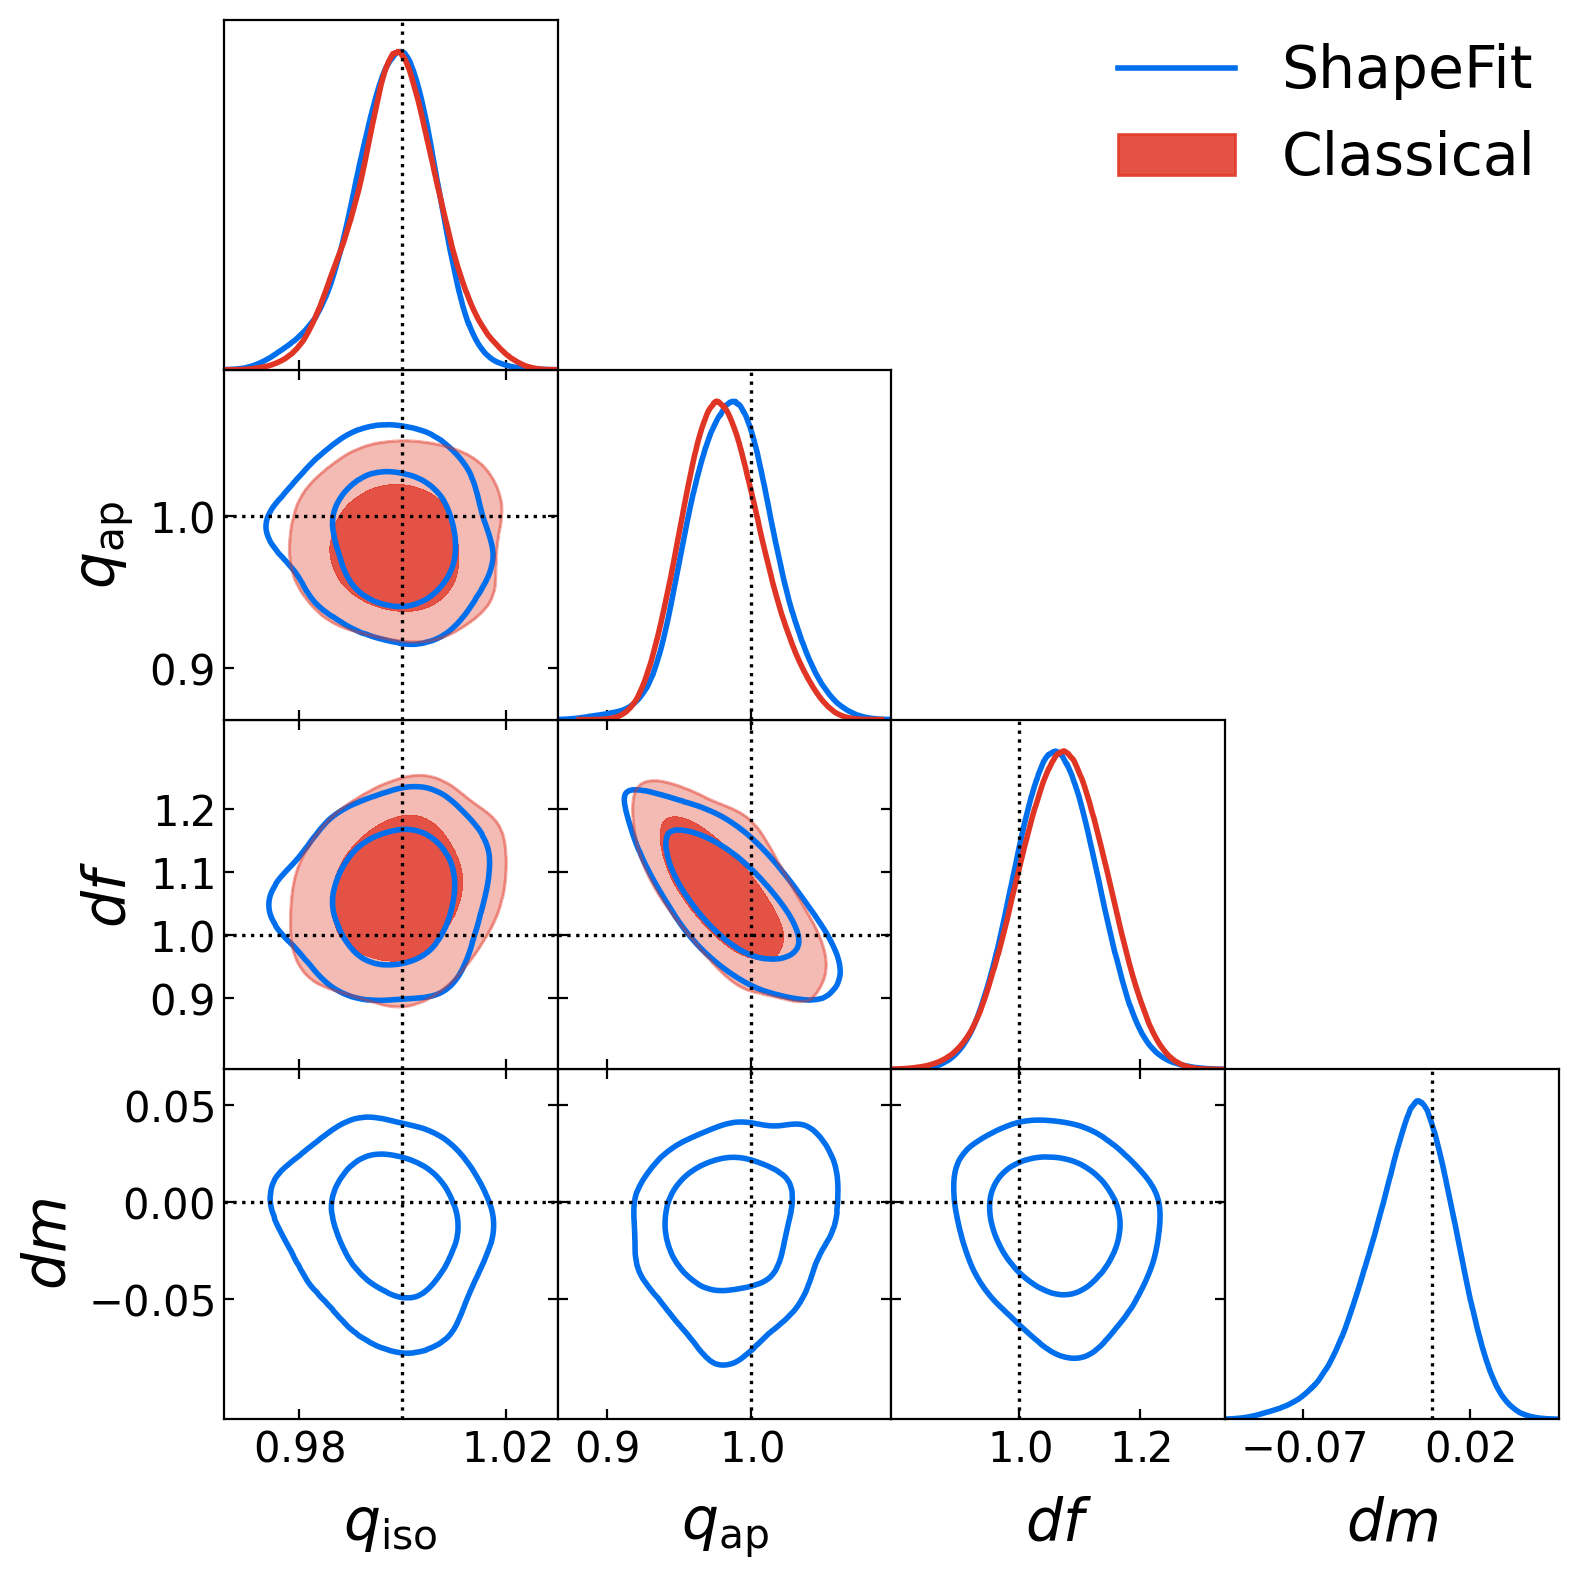

In [3]:
# from mockfactory import Catalog
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
from getdist import plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from cosmoprimo.fiducial import DESI
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samples import Profiles, plotting, Chain
from desilike import setup_logging
setup_logging()  # for logging messages

redshift    = 1.0
model       = 'FOLPS' # Kaiser, TNS, FOLPS
CovRsf      = 25  # -- covariance rescale factor
fitting     = 'SF' #FM, SF, STD
burnin      = 0.7
slice_step  = 700

samples = []
params = ['qiso', 'qap', 'df', 'dm']
for fitting in ['SF','STD']:
    chain_fn    = f'./sampler_result/chain_{model}_V{CovRsf}_z{redshift}_{fitting}.npy'
    chain       = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
    samples.append(chain)

def set_true_values(catalogue, params):
    update_values = {
        'fiducial': {'h': 0.6711, 'omega_cdm': 0.1209, 'Omega_cdm': 0.2685, 'omega_b':0.02207,'logA': 3.0631, 'm_ncdm': 0.0, 'n_s':0.9624, 'w0_fld':-1.0,
                     'qiso': 1.0, 'qap': 1.0, 'df': 1.0, 'dm':0.0},
        'Mnu_p': {'h': 0.6711, 'omega_cdm': 0.1198, 'Omega_cdm': 0.2661, 'omega_b':0.02207,'logA': 3.1247, 'm_ncdm': 0.1, 'n_s':0.9624, 'w0_fld':-1.0},
        'Mnu_ppp': {'h': 0.6711, 'omega_cdm': 0.1166, 'Omega_cdm': 0.2590, 'omega_b':0.02207,'logA': 3.3113, 'm_ncdm': 0.4, 'n_s':0.9624, 'w0_fld':-1.0}
    }
    if catalogue in update_values:
        truth_values = update_values[catalogue]
    return [truth_values[param] for param in params if param in truth_values]

g = plots.get_subplot_plotter()
g.settings.fig_width_inch= 8
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 18
g.settings.figure_legend_frame = False
plotting.plot_triangle(samples, params= params, contour_lws = [2.0, 2.0], filled= [False, True], 
                       legend_loc ='upper right',legend_labels = [f'ShapeFit',f'Classical'],g=g)
true_values = set_true_values('fiducial', params)
for i in range(len(true_values)):
    for j in range(i+1):
        g.subplots[i,j].axvline(true_values[j], c = 'k', ls = ':', lw = 1.2)
        if i != j : g.subplots[i,j].axhline(true_values[i], c = 'k', ls = ':', lw = 1.2)
g.export(dpi=600)

[000065.07] [0/1] 10-17 11:45  Chain                     INFO     Loading ./sampler_result/chain_FOLPS_V25_z1.0_SF_compression.npy.
[000065.09] [0/1] 10-17 11:45  Chain                     INFO     Loading ./sampler_result/chain_FOLPS_V25_z1.0_STD_compression.npy.
[000065.11] [0/1] 10-17 11:45  Chain                     INFO     Loading ./sampler_result/chain_FOLPS_V25_z1.0_FM.npy.
Removed no burn in
Removed no burn in
Removed no burn in


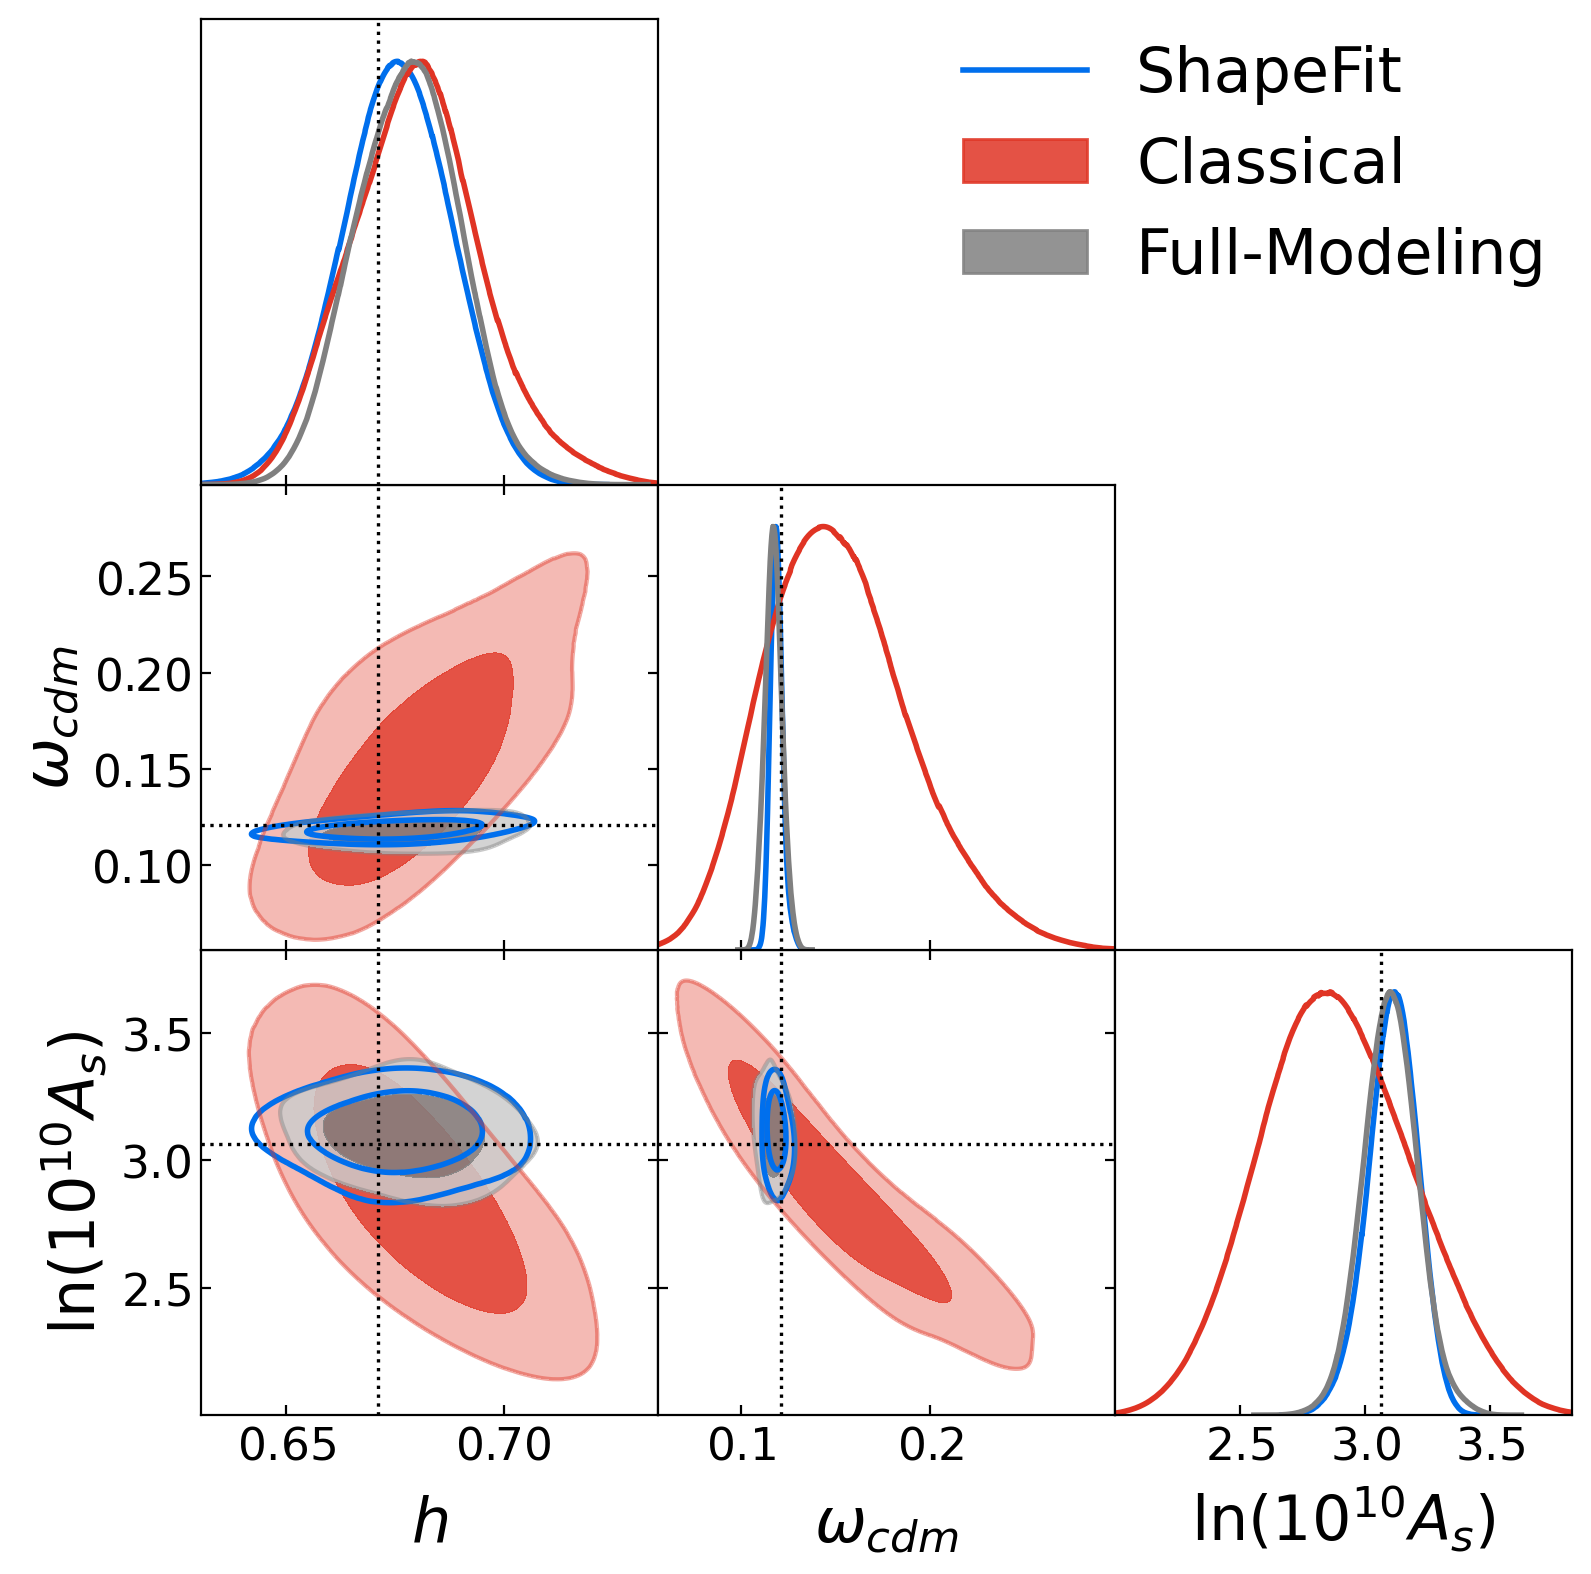

In [5]:
# compression posterior plot
samples = []
params =  ['h','omega_cdm','logA']

for fitting in ['SF','STD', 'FM']:
    if fitting == 'SF' or 'STD':
        chain_fn    = f'./sampler_result/chain_{model}_V{CovRsf}_z{redshift}_{fitting}_compression.npy'
    if fitting ==  'FM':
        chain_fn    = f'./sampler_result/chain_{model}_V{CovRsf}_z{redshift}_{fitting}.npy'
    chain       = Chain.load(chain_fn).remove_burnin(burnin)[::slice_step]
    samples.append(chain)

def set_true_values(catalogue, params):
    update_values = {
        'fiducial': {'h': 0.6711, 'omega_cdm': 0.1209, 'Omega_cdm': 0.2685, 'omega_b':0.02207,'logA': 3.0631, 'm_ncdm': 0.0, 'n_s':0.9624, 'w0_fld':-1.0,
                     'qiso': 1.0, 'qap': 1.0, 'df': 1.0, 'dm':0.0},
        'Mnu_p': {'h': 0.6711, 'omega_cdm': 0.1198, 'Omega_cdm': 0.2661, 'omega_b':0.02207,'logA': 3.1247, 'm_ncdm': 0.1, 'n_s':0.9624, 'w0_fld':-1.0},
        'Mnu_ppp': {'h': 0.6711, 'omega_cdm': 0.1166, 'Omega_cdm': 0.2590, 'omega_b':0.02207,'logA': 3.3113, 'm_ncdm': 0.4, 'n_s':0.9624, 'w0_fld':-1.0}
    }
    if catalogue in update_values:
        truth_values = update_values[catalogue]
    return [truth_values[param] for param in params if param in truth_values]

g = plots.get_subplot_plotter()
g.settings.fig_width_inch= 8
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 18
g.settings.figure_legend_frame = False
plotting.plot_triangle(samples, params= params, contour_lws = [2.0, 2.0, 2.0], legend_loc ='upper right',  filled = [False, True, True],
                           legend_labels = [f'ShapeFit',f'Classical', f'Full-Modeling'], g=g)
true_values = set_true_values('fiducial', params)
for i in range(len(true_values)):
    for j in range(i+1):
        g.subplots[i,j].axvline(true_values[j], c = 'k', ls = ':', lw = 1.2)
        if i != j : g.subplots[i,j].axhline(true_values[i], c = 'k', ls = ':', lw = 1.2)
g.export(dpi=600)